# Importing packages

In [1]:
#importing packages
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn import linear_model
import matplotlib.pyplot as plt

# Reading Excel file saved in hard drive

In [2]:
#reading the file
df = pd.read_excel("C:\\Users\\rluck\\OneDrive\\fisher_update.xlsx")
df

,DATE,P,R
0,1969-12-01,17.1,5.65
1,1970-03-01,17.3,7.15
2,1970-06-01,17.5,8.70
3,1970-09-01,17.6,6.35
4,1970-12-01,17.9,6.50
...,...,...,...
166,2011-06-01,178.3,4.99
167,2011-09-01,179.4,4.81
168,2011-12-01,179.4,4.51
169,2012-03-01,179.5,4.44


# Calculating annual inflation from quarterly CPI 

Quarterly CPI: 
    $$INF_{qtr} = 100*ln(P_t/P_{t-1})$$
    
Annual CPI
   $$INF_{qtr} = 400*ln(P_t/P_{t-1})$$

In [3]:
#computing the inflation rate
df['INF'] = 400*np.log(df['P']/df['P'].shift(1))
df

,DATE,P,R,INF
0,1969-12-01,17.1,5.65,NaN
1,1970-03-01,17.3,7.15,4.651215
2,1970-06-01,17.5,8.70,4.597752
3,1970-09-01,17.6,6.35,2.279208
4,1970-12-01,17.9,6.50,6.760724
...,...,...,...,...
166,2011-06-01,178.3,4.99,3.605658
167,2011-09-01,179.4,4.81,2.460170
168,2011-12-01,179.4,4.51,0.000000
169,2012-03-01,179.5,4.44,0.222903


In [4]:
# Generating integrating differences series
df['DINF'] = df['INF'].diff(1).dropna()
df['DINF1'] = df['DINF'].shift(1).dropna()
df['DINF2'] = df['DINF'].shift(2).dropna()
df['DINF3'] = df['DINF'].shift(3).dropna()
df['DINF4'] = df['DINF'].shift(4).dropna()
df['DR'] = df['R'].diff(1).dropna()
df['DR1'] = df['DR'].shift(1).dropna()
df['DR2'] = df['DR'].shift(2).dropna()
df['DR3'] = df['DR'].shift(3).dropna()
df['DR4'] = df['DR'].shift(4).dropna()
df.head(60)


,DATE,P,R,INF,DINF,DINF1,DINF2,DINF3,DINF4,DR,DR1,DR2,DR3,DR4
0,1969-12-01,17.1,5.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-03-01,17.3,7.15,4.651215,NaN,NaN,NaN,NaN,NaN,1.50,NaN,NaN,NaN,NaN
2,1970-06-01,17.5,8.70,4.597752,-0.053463,NaN,NaN,NaN,NaN,1.55,1.50,NaN,NaN,NaN
3,1970-09-01,17.6,6.35,2.279208,-2.318543,-0.053463,NaN,NaN,NaN,-2.35,1.55,1.50,NaN,NaN
4,1970-12-01,17.9,6.50,6.760724,4.481516,-2.318543,-0.053463,NaN,NaN,0.15,-2.35,1.55,1.50,NaN
5,1971-03-01,18.1,8.00,4.444490,-2.316234,4.481516,-2.318543,-0.053463,NaN,1.50,0.15,-2.35,1.55,1.50
6,1971-06-01,18.4,8.15,6.575491,2.131000,-2.316234,4.481516,-2.318543,-0.053463,0.15,1.50,0.15,-2.35,1.55
7,1971-09-01,18.8,6.45,8.602482,2.026992,2.131000,-2.316234,4.481516,-2.318543,-1.70,0.15,1.50,0.15,-2.35
8,1971-12-01,19.2,5.90,8.421364,-0.181118,2.026992,2.131000,-2.316234,4.481516,-0.55,-1.70,0.15,1.50,0.15
9,1972-03-01,19.4,5.50,4.145115,-4.276249,-0.181118,2.026992,2.131000,-2.316234,-0.40,-0.55,-1.70,0.15,1.50


# Selecting sample data from row 57:Qtr 1 1984 to row 170: Qtr 2012

In [5]:
#Selecting the sample from
dta =df.iloc[57:170].dropna()
dta


,DATE,P,R,INF,DINF,DINF1,DINF2,DINF3,DINF4,DR,DR1,DR2,DR3,DR4
57,1984-03-01,65.2,13.77,-1.836269,-11.103093,2.332056,-1.418949,-0.178189,-2.907056,4.88,-2.17,-3.18,-1.02,3.13
58,1984-06-01,65.4,12.81,1.225116,3.061385,-11.103093,2.332056,-1.418949,-0.178189,-0.96,4.88,-2.17,-3.18,-1.02
59,1984-09-01,66.2,10.53,4.863282,3.638166,3.061385,-11.103093,2.332056,-1.418949,-2.28,-0.96,4.88,-2.17,-3.18
60,1984-12-01,67.2,12.34,5.997114,1.133832,3.638166,3.061385,-11.103093,2.332056,1.81,-2.28,-0.96,4.88,-2.17
61,1985-03-01,68.1,15.29,5.321586,-0.675528,1.133832,3.638166,3.061385,-11.103093,2.95,1.81,-2.28,-0.96,4.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2011-03-01,176.7,4.92,6.159232,4.546791,-1.166956,0.214539,-0.959393,1.394699,-0.11,0.21,-0.07,0.56,0.20
166,2011-06-01,178.3,4.99,3.605658,-2.553574,4.546791,-1.166956,0.214539,-0.959393,0.07,-0.11,0.21,-0.07,0.56
167,2011-09-01,179.4,4.81,2.460170,-1.145488,-2.553574,4.546791,-1.166956,0.214539,-0.18,0.07,-0.11,0.21,-0.07
168,2011-12-01,179.4,4.51,0.000000,-2.460170,-1.145488,-2.553574,4.546791,-1.166956,-0.30,-0.18,0.07,-0.11,0.21


# Plotting the time series: Inflation 

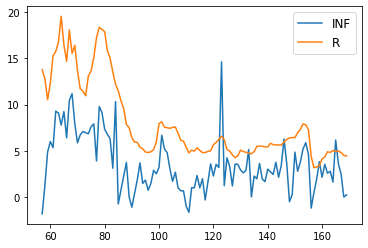

In [6]:
#plotting the series
plt.plot(dta['INF'],label='INF')
plt.plot(dta['R'],label='R')
plt.legend(loc='best', fontsize='large')
plt.show()

In [7]:
#Regressing Interest Rate (Y=R) against the Inflation rate (X= INF)
reg = linear_model.LinearRegression()
X =dta[['INF']].dropna()
y =dta['R'].dropna()
reg.fit(X,y)
predictions =reg.predict(X)

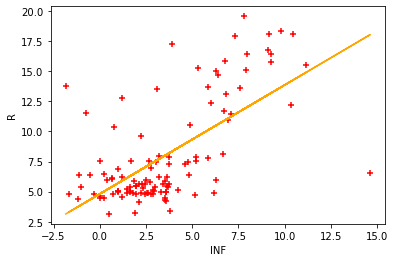

In [8]:
plt.xlabel('INF')
plt.ylabel('R')
plt.scatter(dta.INF,dta.R,color='red',marker='+')
plt.plot(dta.INF,reg.predict(dta[['INF']]), color='orange')

In [9]:
#model with intercept
X = dta.INF
y = dta.R
X= sm.add_constant(X)
model= sm.OLS(y,X).fit()
predictions = model.predict(X)
G= (model.summary())
print(G)

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     77.80
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.83e-14
Time:                        21:22:16   Log-Likelihood:                -294.55
No. Observations:                 113   AIC:                             593.1
Df Residuals:                     111   BIC:                             598.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8120      0.480     10.020      0.0

# Correlogram of Residuals: ACF and PACF

$\epsilon_t= y_t- (\beta * X_t + \alpha)$

In [10]:
dtr = model.resid
dtr

57     10.617794
58      6.890682
59      1.322232
60      2.107389
61      5.667982
         ...    
165    -5.459146
166    -3.081032
167    -2.225653
168    -0.301965
169    -0.573442
Length: 113, dtype: float64

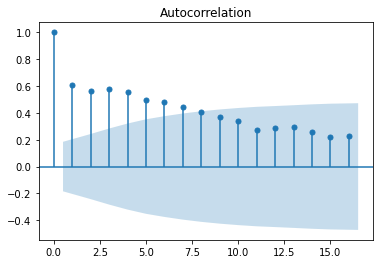

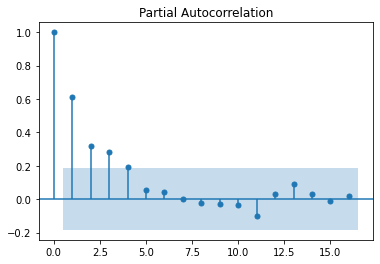

In [11]:
#running ACF and PACF
sm.graphics.tsa.plot_acf(dtr.values.squeeze(),lags=16)
sm.graphics.tsa.plot_pacf(dtr.values.squeeze(),lags=16)
plt.show()

In [12]:
# Generating the Q tables
import numpy as np
r,q,p = sm.tsa.acf(dtr.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print (table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0   0.604164   42.351394  7.626197e-11
2.0   0.561012   79.197947  6.344308e-18
3.0   0.574160  118.142798  1.938169e-25
4.0   0.558060  155.271704  1.509379e-32
5.0   0.498832  185.212371  4.120822e-38
6.0   0.477251  212.874547  3.437139e-43
7.0   0.444019  237.044412  1.579656e-47
8.0   0.404992  257.343619  4.775363e-51
9.0   0.370545  274.499942  6.605085e-54
10.0  0.337784  288.895138  3.451093e-56
11.0  0.275816  298.587198  1.738371e-57
12.0  0.286480  309.146676  5.627670e-59
13.0  0.296186  320.546711  1.193303e-60
14.0  0.259174  329.363744  8.672219e-62
15.0  0.223192  335.969290  1.796166e-62
16.0  0.226696  342.854116  3.193704e-63
17.0  0.255196  351.669754  2.217145e-64
18.0  0.223284  358.489525  3.951410e-65
19.0  0.298762  370.829082  4.992993e-67
20.0  0.321913  385.309124  2.265168e-69
21.0  0.282732  396.600261  4.685822e-71
22.0  0.298276  409.305178  4.926778e-73
23.0  0.234833  

C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


# ADF test of stationarity and unit root

In [13]:
residuals = model.resid
residuals

57     10.617794
58      6.890682
59      1.322232
60      2.107389
61      5.667982
         ...    
165    -5.459146
166    -3.081032
167    -2.225653
168    -0.301965
169    -0.573442
Length: 113, dtype: float64

In [14]:
dtr


57     10.617794
58      6.890682
59      1.322232
60      2.107389
61      5.667982
         ...    
165    -5.459146
166    -3.081032
167    -2.225653
168    -0.301965
169    -0.573442
Length: 113, dtype: float64

In [15]:
#ADF Tests
from arch.unitroot import ADF
ADF(residuals,trend="n",lags=1, max_lags=12, method='BIC')

Test Statistic,-3.854
P-value,0.000
Lags,1


# Engle Granger Cointegration Test

In [16]:
from arch.unitroot import engle_granger
engle_test = engle_granger(y,X, trend ="n",lags=1)
engle_test

Test Statistic,-3.854
P-value,0.010
ADF Lag length,1
Estimated Root ρ (γ+1),0.711


# DR Regressed against DR & DINF with lags up to 4

$\epsilon_t = y_t - (\beta x_t + \alpha)$

In [17]:
dta['resid'] = y -model.predict(X)
#Residual series by lag 1
dta['resid_1']= dta['resid'].shift(1)
dta = dta.dropna(subset=['resid_1'])
dta

,DATE,P,R,INF,DINF,DINF1,DINF2,DINF3,DINF4,DR,DR1,DR2,DR3,DR4,resid,resid_1
58,1984-06-01,65.4,12.81,1.225116,3.061385,-11.103093,2.332056,-1.418949,-0.178189,-0.96,4.88,-2.17,-3.18,-1.02,6.890682,10.617794
59,1984-09-01,66.2,10.53,4.863282,3.638166,3.061385,-11.103093,2.332056,-1.418949,-2.28,-0.96,4.88,-2.17,-3.18,1.322232,6.890682
60,1984-12-01,67.2,12.34,5.997114,1.133832,3.638166,3.061385,-11.103093,2.332056,1.81,-2.28,-0.96,4.88,-2.17,2.107389,1.322232
61,1985-03-01,68.1,15.29,5.321586,-0.675528,1.133832,3.638166,3.061385,-11.103093,2.95,1.81,-2.28,-0.96,4.88,5.667982,2.107389
62,1985-06-01,69.7,15.75,9.289242,3.967656,-0.675528,1.133832,3.638166,3.061385,0.46,2.95,1.81,-2.28,-0.96,2.541714,5.667982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2011-03-01,176.7,4.92,6.159232,4.546791,-1.166956,0.214539,-0.959393,1.394699,-0.11,0.21,-0.07,0.56,0.20,-5.459146,-1.239412
166,2011-06-01,178.3,4.99,3.605658,-2.553574,4.546791,-1.166956,0.214539,-0.959393,0.07,-0.11,0.21,-0.07,0.56,-3.081032,-5.459146
167,2011-09-01,179.4,4.81,2.460170,-1.145488,-2.553574,4.546791,-1.166956,0.214539,-0.18,0.07,-0.11,0.21,-0.07,-2.225653,-3.081032
168,2011-12-01,179.4,4.51,0.000000,-2.460170,-1.145488,-2.553574,4.546791,-1.166956,-0.30,-0.18,0.07,-0.11,0.21,-0.301965,-2.225653


Multiple Regression

In [18]:
#model with intercept
x_1 = dta[['resid_1','DR1','DR2','DR3','DR4','DINF1','DINF2','DINF3','DINF4']]
y_1 = dta['DR']
x_1= sm.add_constant(x_1)
model_1 = sm.OLS(y_1,x_1).fit()
predictions = model_1.predict(x_1)
h= (model_1.summary())
print(h)

                            OLS Regression Results                            
Dep. Variable:                     DR   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     2.633
Date:                Fri, 16 Jul 2021   Prob (F-statistic):            0.00881
Time:                        21:22:17   Log-Likelihood:                -151.97
No. Observations:                 112   AIC:                             323.9
Df Residuals:                     102   BIC:                             351.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0631      0.094     -0.674      0.5

# DINF Regressed against DR & DINF with lags up to 4

In [19]:
#model with intercept
x_1 = dta[['resid_1','DR1','DR2','DR3','DR4','DINF1','DINF2','DINF3','DINF4']]
y_2 = dta['DINF']
x_1= sm.add_constant(x_1)
model_2 = sm.OLS(y_2,x_1).fit()
predictions = model_2.predict(x_1)
I= (model_2.summary())
print(I)

                            OLS Regression Results                            
Dep. Variable:                   DINF   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     6.574
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           2.36e-07
Time:                        21:22:17   Log-Likelihood:                -252.89
No. Observations:                 112   AIC:                             525.8
Df Residuals:                     102   BIC:                             553.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0106      0.231     -0.046      0.9

$\textbf{Wald Tests}$

In [20]:
#Wald test om model_1: Restricting coefficient 7 to 10 (if p >0,05, restrictions cannot be rejected )
R = np.eye(len(model_1.params))[5:10]
model_1.wald_test(R)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[1.29567193]]), p=0.2716573127484845, df_denom=102, df_num=5>

In [21]:
#Wald test om model_1: Restricting coefficient 5 and 6 (if p >0,05, Restrictions cannot be rejected)
R = np.eye(len(model_2.params))[4:6]
model_2.wald_test(R)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.2258903]]), p=0.7982036497279359, df_denom=102, df_num=2>

# DR Regressed against DR with lags up to 4

In [22]:
x_3 = dta[['resid_1','DR1','DR2','DR3','DR4']]
y_3 = dta['DR']
x_3= sm.add_constant(x_3)
model_3 = sm.OLS(y_3,x_3).fit()
predictions = model_3.predict(x_3)
J= (model_3.summary())
print(J)

                            OLS Regression Results                            
Dep. Variable:                     DR   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     3.578
Date:                Fri, 16 Jul 2021   Prob (F-statistic):            0.00498
Time:                        21:22:17   Log-Likelihood:                -154.93
No. Observations:                 112   AIC:                             321.9
Df Residuals:                     106   BIC:                             338.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0653      0.094     -0.693      0.4

# DINF Regressed against DINF with lags up to 4

In [23]:
x_4 = dta[['resid_1','DR1','DR2','DINF1','DINF2','DINF3','DINF4']]
y_4 = dta['DINF']
x_4= sm.add_constant(x_4)
model = sm.OLS(y_4,x_4).fit()
predictions = model.predict(x_4)
K= (model.summary())
print(K)

                            OLS Regression Results                            
Dep. Variable:                   DINF   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8.515
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           3.26e-08
Time:                        21:22:17   Log-Likelihood:                -253.14
No. Observations:                 112   AIC:                             522.3
Df Residuals:                     104   BIC:                             544.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0244      0.228     -0.107      0.9

In [24]:
#Wald test om model_3: Restricting coefficient 4 (if p >0,05, restrictions cannot be rejected )
R = np.eye(len(model_3.params))[3:4]
model_3.wald_test(R)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.03790856]]), p=0.8459995477076325, df_denom=106, df_num=1>

In [25]:
#Model 5
x_5 = dta[['resid_1','DR1','DR3','DR4']]
y_5 = dta['DR']
x_5= sm.add_constant(x_5)
model_5 = sm.OLS(y_5,x_5).fit()
predictions = model_5.predict(x_5)
k= (model_5.summary())
print(k)

                            OLS Regression Results                            
Dep. Variable:                     DR   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     4.503
Date:                Fri, 16 Jul 2021   Prob (F-statistic):            0.00211
Time:                        21:22:17   Log-Likelihood:                -154.95
No. Observations:                 112   AIC:                             319.9
Df Residuals:                     107   BIC:                             333.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0644      0.094     -0.687      0.4

In [26]:
#Wald test om model_5: Restricting coefficient 5 (if p >0,05, restrictions cannot be rejected )
R = np.eye(len(model_5.params))[4:5]
model_5.wald_test(R)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.89881769]]), p=0.345235217373811, df_denom=107, df_num=1>

In [27]:
# Model 6
x_6 = dta[['resid_1','DR1','DR3']]
y_6 = dta['DR']
x_6= sm.add_constant(x_6)
model_6 = sm.OLS(y_6,x_6).fit()
predictions = model_6.predict(x_6)
k= (model_6.summary())
print(k)

                            OLS Regression Results                            
Dep. Variable:                     DR   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     5.710
Date:                Fri, 16 Jul 2021   Prob (F-statistic):            0.00115
Time:                        21:22:17   Log-Likelihood:                -155.42
No. Observations:                 112   AIC:                             318.8
Df Residuals:                     108   BIC:                             329.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0587      0.094     -0.628      0.5